# Feature engineering with Python


<img src="https://www.python.org/static/img/python-logo.png" alt="yogen" style="width: 200px; float: right;"/>
<br>
<br>
<br>
<img src="../assets/yogen-logo.png" alt="yogen" style="width: 200px; float: right;"/>


## The machine learning pipeline

Machine learning models expect numeric arrays, but data in the real world is in many different forms...


![so we need to go from one to the other!](https://blog.dominodatalab.com/wp-content/uploads/2018/08/Casari-Feature-Eng-Image-2-768x433.png)

From [Feature engineering with Python](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/)

## Let's play!

We will try to guess a players' position

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
pd.options.display.max_columns = None

In [2]:
df = pd.read_csv('/home/dsc/Machine Learning (Unsupervised Learning) and Feature Engineering/players_20.csv',index_col=0)
df.head()

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,

https://fifafootballvideogames.fandom.com/wiki/Soccer_positions

So, to begin with, we need to extract a target feature.

In [3]:
starter = df[~df['team_position'].isin(['RES','SUB'])]

target = starter['team_position'].isin(['DM','LM','RW','LM','RM','CM','AM']).astype(int)
target.value_counts()

0    6466
1    1034
Name: team_position, dtype: int64

### Do a first approximation to use as baseline

In [8]:
#siempre hay que hacer esto en un proyecto de Machine Learnign, usar una referencia.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve

classifier = LogisticRegression()

data = starter.select_dtypes('number').fillna(0)
data.shape


(7500, 60)

In [9]:
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8
20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11
190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11
200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89
183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data,target)
#por defecto 75,25
X_train.shape,X_test.shape

((5625, 60), (1875, 60))

In [12]:
classifier.fit(X_train,y_train)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
predictions = classifier.predict(X_test)
probabilities = classifier.predict_proba(X_test)[:,1]
#importante para quedarme con la columna 1

f1_score(y_test,predictions), accuracy_score(y_test,predictions),roc_auc_score(y_test, probabilities)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.0, 0.8704, 0.4913181836520617)

In [ ]:
## Es una mierda, aunque la accuracy sea buena hay que fijarse en lo demás también, porque puede haber desequilibrio
#de clases, es decir el test, no estaba cogiendo centrocampistas. habia uno de 1034.

Text(0, 0.5, 'tpr')

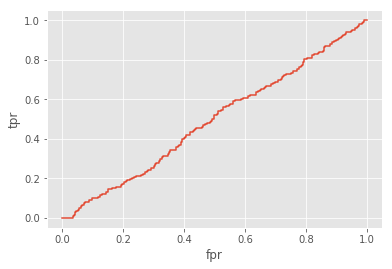

In [34]:
#vamos a ver roc_curve.
fpr,tpr,threshold = roc_curve(y_test,probabilities)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
#fpr es false positive rate, y tpr true positive rate
#lo que est grafica quiere decir es que siempre que dice 1 acierta, pero falla siempre también
#lo ideal es lo que vimos , lo peor es la diagonal , porque si es peor, se equivoca mas que acierta,
#e invirtiendolo es mejor

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.8533333333333334, 0.0, 0.5281977272727273)

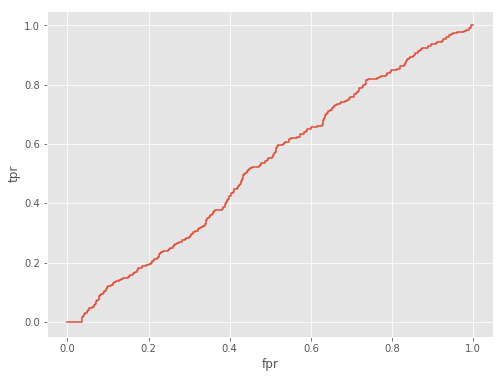

In [13]:
#funcion para ver con el clasificador y características y target cuales dan buenos resultados
def evaluate(classifier, features, target):

    

    X_train, X_test, y_train, y_test = train_test_split(features, target)

    classifier.fit(X_train, y_train)


    predictions = classifier.predict(X_test)

    probabilities = classifier.predict_proba(X_test)[:, 1]


    acc = accuracy_score(y_test, predictions)

    f1 = f1_score(y_test, predictions)

    auc = roc_auc_score(y_test, probabilities)

    fpr, tpr, threshold = roc_curve(y_test, probabilities)

    

    plt.plot(fpr, tpr)

    plt.xlabel('fpr')

    plt.ylabel('tpr')

    plt.gcf().set_size_inches(8, 6)

    

    return acc, f1, auc


evaluate(classifier, data, target)

## Empezamos con el Feature Enginnering

## Categorical variables

`nationality`, `club`

### One hot

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)


In [ ]:
#Metodo por defecto para tirarse a variables categóricas.

In [40]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

encoded = encoder.fit_transform(starter['team_position'].dropna().values.reshape(-1,1))
#importante el reshape para que el array sea una matriz, te lo pide en matrices scikit learn

encoded.todense()
#el jugador en la 3 fila pertence a la categoría 0, y así transformamos datos para que se los coma ML.

matrix([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
encoder.categories_

[array(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LAM', 'LB', 'LCB', 'LCM',
        'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB', 'RAM', 'RB', 'RCB', 'RCM',
        'RDM', 'RF', 'RM', 'RS', 'RW', 'RWB', 'ST'], dtype=object)]

In [43]:
pd.DataFrame(encoded.todense(),index=starter['team_position'].dropna().values.reshape(-1,1))
#para entender lo que hace One Hot por sia caso no había quedado claro.

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
"(RW,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
"(LW,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(CAM,)",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(GK,)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(LW,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(RCM,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(GK,)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(LCB,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(RCM,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"(RW,)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


This would work okay, but what about nationalities?

In [44]:
encoder.fit_transform(starter['nationality'].dropna().values.reshape(-1,1))

<7500x140 sparse matrix of type '<class 'numpy.float64'>'
	with 7500 stored elements in Compressed Sparse Row format>

In [59]:
frequent_nationalities = starter['nationality'].value_counts()[:10].index.values
frequent_nationalities 
#con las 10 primeras nacionalidades ya hemos cubierto un montón

array(['England', 'Germany', 'Brazil', 'Spain', 'Argentina', 'France',
       'Italy', 'Colombia', 'Netherlands', 'Norway'], dtype=object)

In [60]:
other_nationalities = starter['nationality'].value_counts()[10:].index.values
other_nationalities

In [ ]:
categories = frequent_nationalities

In [ ]:
data = starter.select.dtypes('number')

encoder = OneHotEncoder(categories = frequent_nationalities.to_list())

encoder.fit_transform(starter['nationality'].reshape(-1,1))

### Target encoding

Also known as bin counting


With high cardinality discrete data like user_ids we would be left with many variables by one hot encoding, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding/).


In [62]:
target.head()
#que es centrocampista

sofifa_id
158023    1
20801     0
190871    0
200389    0
183277    0
Name: team_position, dtype: int64

In [63]:
#otra técnica para variables categóricas
#lo que vamos a hacer es sustituir Argentina por el % de argentinos que es centrocampista, y aasí para todos. En
#vez de crear una columna por cada valor , hago eso. Muestro lo que tenemos y en la siguiente lo hacemos.
starter['nationality'].head()

sofifa_id
158023    Argentina
20801      Portugal
190871       Brazil
200389     Slovenia
183277      Belgium
Name: nationality, dtype: object

In [ ]:
#Esto tiene que haber una muestra suficiente por id, interesante el post que hay de un 
#chaval que luego le da peso a eso sporcentajes  no es lo mismo una muestar con 100 argentinos, que con 1

In [72]:
percs_midfielders = target.groupby(starter['nationality']).agg(['mean','count']).sort_values(by='count',ascending=False)
percs_midfielders

,mean,count
nationality,,
England,0.114780,636
Germany,0.148936,470
Brazil,0.124138,435
Spain,0.175904,415
Argentina,0.126551,403
France,0.139108,381
Italy,0.124542,273
Colombia,0.189300,243
Netherlands,0.133333,180


In [76]:
with_percs = starter.merge(percs_midfielders,left_on='nationality',right_index=True)
data['nationality_te']= with_percs['mean']

In [77]:
data.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,nationality_te
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,0.0,87.0,92.0,92.0,96.0,39.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,0.126551
20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,7.0,90.0,93.0,82.0,89.0,35.0,78.0,0.0,0.0,0.0,0.0,0.0,0.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,0.196078
190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,10.0,91.0,85.0,87.0,95.0,32.0,58.0,0.0,0.0,0.0,0.0,0.0,0.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,0.124138
200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,89.0,52.0,90.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.107143
183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,10.0,91.0,83.0,86.0,94.0,35.0,66.0,0.0,0.0,0.0,0.0,0.0,0.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,0.160000


In [ ]:
# hay una librerís de eencoders que tiene este y el onehot y tal, pero esta target no viene integrada
# en scikit learn

In [82]:
redundant = ['nation_jersey_number', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed', 'gk_positioning']

In [83]:
data_non_redundant = data.drop(redundant,axis=1)

In [84]:
data_non_redundant = data_non_redundant.fillna(data_non_redundant.median())

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.8629333333333333, 0.007722007722007722, 0.5647073535565357)

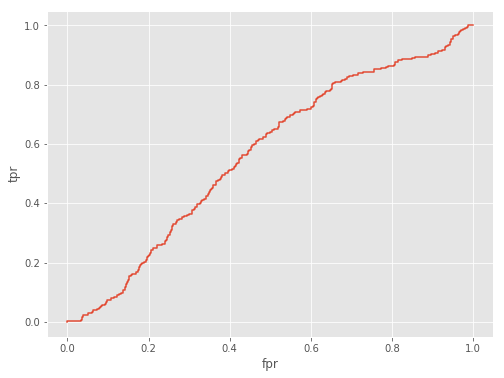

In [85]:
evaluate(classifier,data_non_redundant,target)
#y vemos que ha mejorado sustamcialmente cogiendo haciendo un mejor fillna, con median en vez de con 0.

## Text

You will learn a lot more in the NLP and Deep Learning sections, but let me show you a few basics.

### The lame approach

`work_rate`

In [20]:
starter['work_rate'].unique()

array(['Medium/Low', 'High/Low', 'High/Medium', 'Medium/Medium',
       'High/High', 'Medium/High', 'Low/High', 'Low/Medium', 'Low/Low'],
      dtype=object)

In [21]:
def rate_to_score(rate):
    rates = {'Low':1,'Medium':2,'High':3}
    return rates.get(rate,2)

rate_to_score('High')

3

In [22]:
starter.head(3)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3


In [23]:
split = starter['work_rate'].str.split('/',expand=True)

In [24]:
split


,0,1
sofifa_id,,
158023,Medium,Low
20801,High,Low
190871,High,Medium
200389,Medium,Medium
183277,High,Medium
192985,High,High
192448,Medium,Medium
203376,Medium,Medium
177003,High,High


In [25]:
rates = split.applymap(rate_to_score)
rates.columns = ['attack_work_rate','defense_work_raate']

In [26]:
rates.shape

(7500, 2)

In [27]:
data_non_redundant.shape

NameError: name 'data_non_redundant' is not defined

In [112]:
with_rates = data_non_redundant.join(rates)
with_rates.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,nationality_te,attack_work_rate,defense_work_raate
sofifa_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
158023,32,170,72,94,94,95500000,565000,5,4,4,195800000.0,10.0,2021.0,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,0.126551,2,1
20801,34,187,83,93,93,58500000,405000,5,4,5,96500000.0,7.0,2022.0,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,0.196078,3,1
190871,27,175,68,92,92,105500000,290000,5,5,5,195200000.0,10.0,2022.0,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,0.124138,3,2
200389,26,188,87,91,93,77500000,125000,3,3,1,164700000.0,13.0,2023.0,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,0.107143,2,2
183277,28,175,74,91,91,90000000,470000,4,4,4,184500000.0,7.0,2024.0,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,0.160000,3,2


/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.8768, 0.0, 0.6143552311435523)

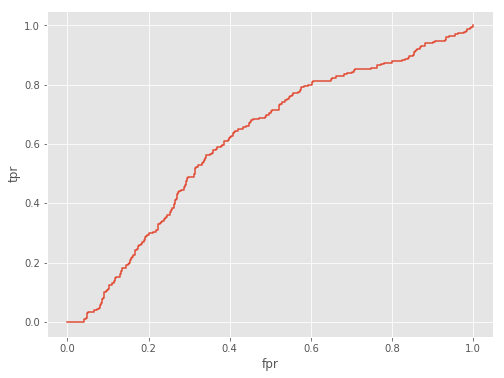

In [119]:
evaluate(classifier,with_rates,target)

### Bag-of-words

`player_traits`

`player_tags`

In [120]:
#antes era simple porque el texto era limitado , Low Medium High
starter[['player_traits','player_tags']]
#como traduzco player_traits, pues one hot encoding

,player_traits,player_tags
sofifa_id,,
158023,"Beat Offside Trap, Argues with Officials, Earl...","#Dribbler, #Distance Shooter, #Crosser, #FK Sp..."
20801,"Long Throw-in, Selfish, Argues with Officials,...","#Speedster, #Dribbler, #Distance Shooter, #Acr..."
190871,"Power Free-Kick, Injury Free, Selfish, Early C...","#Speedster, #Dribbler, #Playmaker , #Crosser,..."
200389,"Flair, Acrobatic Clearance",NaN
183277,"Beat Offside Trap, Selfish, Finesse Shot, Spee...","#Speedster, #Dribbler, #Acrobat"
192985,"Power Free-Kick, Avoids Using Weaker Foot, Div...","#Dribbler, #Playmaker , #Engine, #Distance Sh..."
192448,"Swerve Pass, Acrobatic Clearance, Flair Passes",NaN
203376,"Diver, Avoids Using Weaker Foot, Leadership, L...","#Tackling , #Tactician , #Strength, #Complete ..."
177003,"Argues with Officials, Finesse Shot, Speed Dri...","#Dribbler, #Playmaker , #Crosser, #Acrobat, #..."


### Vector encodings for more than text


## Numerical variables

### Dealing with counts and money

Download https://www.kaggle.com/fernandol/countries-of-the-world

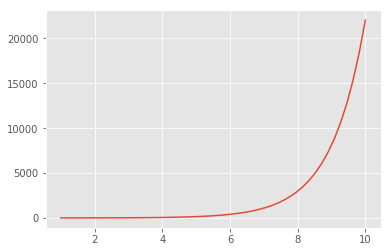

In [121]:
#importante leer sobre esto, ingresos por cliente, saldo en cuenta, poblacion,...siempre habrá que realizae
#una trasformación logarítimica, que aplasta los valores
xs = np.linspace(1,10)

plt.plot(xs,np.exp(xs))

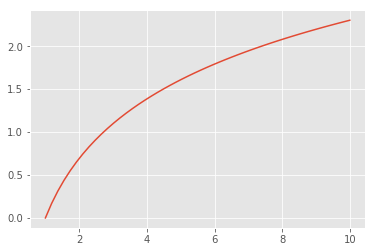

In [122]:
plt.plot(xs,np.log(xs))
#me los aplasta, me transforma distancias multiplicativas en distancias aditivas, es decir no es lo mismo comparar
# 1 con 100, que 1 millon con 1 millon  100

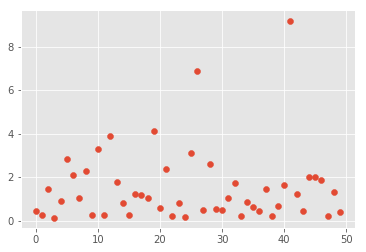

In [28]:
n = 50

exponential = np.exp(np.random.randn(n))

plt.scatter(range(n),exponential)

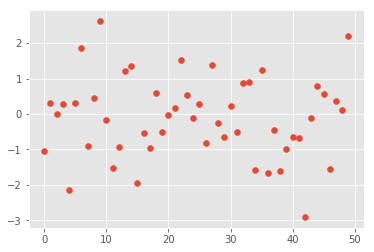

In [126]:
#lo que consigue el logaritmo:
plt.scatter(range(n),np.log(exponential))

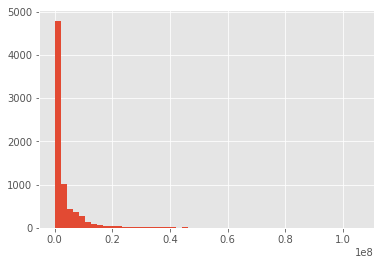

In [128]:
# un ejemplo de esto es:
plt.hist(starter['value_eur'],bins = 50);
#hay mucha dferencia en el valor de euros de jugadores, entonces usaremos la transformación logarítmica.
#5000 jugadores valen muy poco

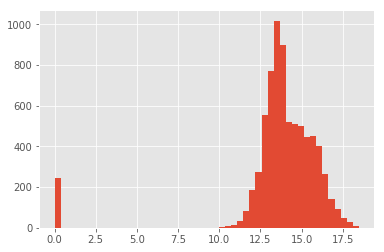

In [129]:
plt.hist(np.log1p(starter['value_eur']),bins = 50);
#el log1p es logaritmos de lo que sea +a para evitarnos errores con 0

In [ ]:
#al random forest se la suda bastante esto, con lo cual como algoritmo de clasificación Random Forest es buena
# opción

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.8714666666666666, 0.4459770114942529, 0.8787636233532714)

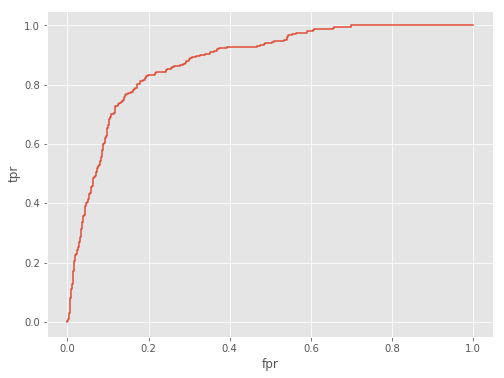

In [133]:
with_rates['log_value'] = np.log1p(with_rates['value_eur'])
with_rates['log_wage'] = np.log1p(with_rates['wage_eur'])
with_rates['log_release'] = np.log1p(with_rates['release_clause_eur'])
log_transformed = with_rates.drop(['value_eur','wage_eur','release_clause_eur'],axis=1)
evaluate(classifier,log_transformed,target)

In [ ]:
#ha mejorado mucho con la regresión logarítmica, el PCA se ve muy influenciado también por las distamcias
# sobre todo económicas

### Scaling

Compare `age`, `height_cm`, `weight_kg` with the skill variables. What if we applied a KNN or a PCA?

In [135]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

MinMaxScaler().fit_transform(np.array([2,3,6,7,4]).reshape(-1,1))
# lo que hace esto es dividir por el máximo valor de la lista cada elemento de la lista de modo que 1
#es el valor mayor

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0. ],
       [0.2],
       [0.8],
       [1. ],
       [0.4]])

In [36]:
StandardScaler().fit_transform(np.array([2,3,6,7,4]).reshape(-1,1))

NameError: name 'StandardScaler' is not defined

In [137]:
#loque haremos normalmente será:
last = StandardScaler().fit_transform(log_transformed)

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [138]:
last
#todos los valores alrededor del 0 y varianza de 1 , es decir hemos sacado las zetas.
#mejor hacer esto siempre si no son árboles

array([[ 1.20514844, -1.71186395, -0.55179917, ...,  1.62548812,
         2.54430644,  1.28450405],
       [ 1.67877102,  0.82124331,  1.00578222, ...,  1.4535385 ,
         2.37307823,  1.12506455],
       [ 0.02109199, -0.9668324 , -1.1181924 , ...,  1.66042705,
         2.20130117,  1.28381247],
       ...,
       [-1.16296445,  0.37422438,  0.72258561, ..., -1.10338676,
        -0.71417585, -0.50387088],
       [-2.3470209 ,  0.97024961, -0.55179917, ..., -1.02509941,
        -0.71417585, -0.35092102],
       [-1.39977574,  1.26826223,  0.15619237, ..., -1.10338676,
        -0.35795094, -0.52057012]])

/home/dsc/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.8810666666666667, 0.45208845208845205, 0.8877775800454999)

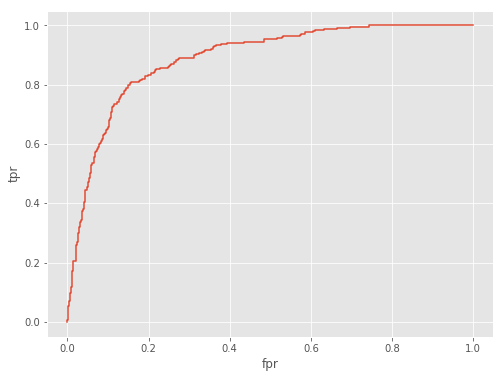

In [139]:


evaluate(classifier,last,target)

In [ ]:
#si el random forest genera el mismo rendimiento que una regresión logística, será mejor la reg logística

### Interaction features

Very useful for linear models. Decision models already have them for free.

## Putting it all together with `sklearn` Pipelines 

For:

1. Convenience

2. Joint parameter selection

### And now the magic

### Target encoding in `sklearn` pipelines

There is no target encoder estimator in sklearn. We can install an additional library or, even more fun, roll our own!

```bash
conda install -c conda-forge category-encoders
```

## Further reading


[Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235): a great book covering all the basics.

[Why is feature scaling required?](https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310)

[When to standardize?](https://statmodeling.stat.columbia.edu/2009/07/11/when_to_standar/)

[Representing Categorical Data with Target Encoding](https://brendanhasz.github.io/2019/03/04/target-encoding)


[A Simple Guide to Scikit-learn Pipelines](https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf)

[scikit-learn for developers](https://scikit-learn.org/stable/developers/develop.html)

[The Categorical Encoders library](https://contrib.scikit-learn.org/category_encoders/)

[Creating your own estimator in scikit-learn](http://danielhnyk.cz/creating-your-own-estimator-scikit-learn/)